# **GROUP 3-PHASE 4-PROJECT**


## **Topic: Sentiment Analysis of Twitter Google and Apple products**

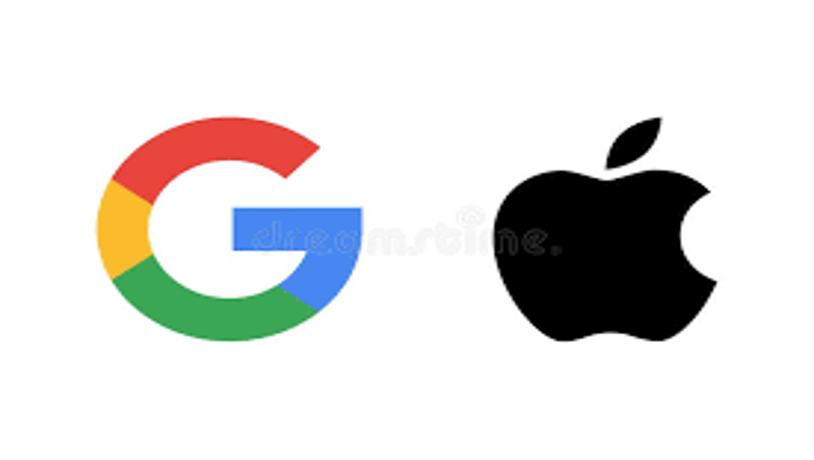

https://www.dreamstime.com/google-apple-company-logo-vector-editorial-illustration-vinnitsia-ukraine-january-google-apple-company-logo-icons-vector-image209170387

### **1.0 Business Understanding**

**1.1 Background and Context**

With the growing use of social media, especially Twitter, there is more information than ever before about how consumers receive and react to products in the market. Twitter serves as a real-time feedback platform where users express their opinions—both positive and negative—about products and services.

The company has been tasked with the analysis of Twitter sentiments in relation to Google and Apple products, with the aim of better understanding public perception and ultimately aligning product offerings with market demand. This comes at a time when consumer expectations are rapidly evolving, and timely insight into public sentiment can be a competitive advantage.

Apple and Google, being two of the most dominant players in the technology space, receive continuous attention online. Mining this Twitter data presents an opportunity to measure public mood, detect dissatisfaction or enthusiasm around specific product lines, and support data-driven decision-making across marketing, customer support, and product development functions.




**1.2 Stakeholder**

The key stakeholders for this sentiment analysis project include:

**The Marketing Team:**- Interested in tracking brand perception and campaign impact;

**Product Managers:**- Can use sentiment insights to inform feature enhancements;

**Customer Support Team:**-  Looking to identify and address common user complaints.

**The Data Science Team:**- Responsible for building and maintaining the model;

**Executive Leadership:**- Relies on sentiment trends for strategic decision-making.

**PR and Communications teams:**- Monitor public opinion to manage the company’s image.

Together, these stakeholders leverage sentiment insights to enhance product development, customer engagement, and brand strategy.


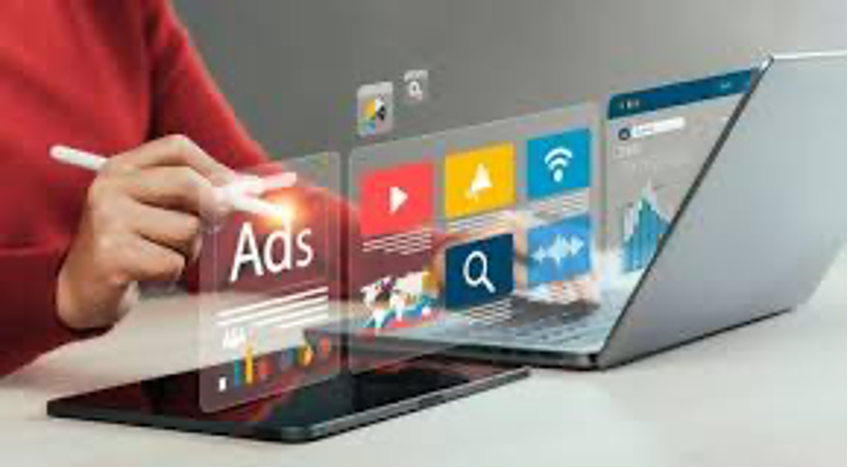

https://www.shutterstock.com/search/google-digital-marketing

### **2.0 Project Objective and Questions**


**2.1 Objective**

The primary objective is to:

*Develop an NLP model that can automatically classify Tweets about Apple and Google products as positive, negative, or neutral in sentiment.*

This will serve as a Proof of Concept (PoC) that demonstrates how sentiment insights from social media can:

o Support marketing and brand management teams

o Inform customer service teams about recurring issues

o Alert product teams to common pain points or praised features

**2.2 Key Questions**

This project will aim to answer the following questions:

i. What proportion of Twitter sentiment is positive, negative, or neutral for Apple vs Google products?

ii. Which products are associated with the most negative or positive sentiment?

iii. Are there recurring themes in positive/negative Tweets (e.g., battery life, design, price)?

iv. How well can an automated classifier predict sentiment based on Tweet content?



### **3.0 Data Understanding**

The dataset used in this project originates from CrowdFlower via data.world (https://data.world/crowdflower/brands-and-product-emotions/workspace/file?filename=judge-1377884607_tweet_product_company.csv) and contains 9,093 Tweets related to Apple and Google products. Each Tweet has been labeled by human raters to reflect the sentiment expressed—categorized as positive, negative, or neutral—and, where possible, the specific product or brand mentioned. 

The dataset comprises three main columns: the Tweet content (tweet_text), the target of the sentiment (emotion_in_tweet_is_directed_at), and the sentiment label (is_there_an_emotion_directed_at_a_brand_or_product). 
The Tweet text is nearly complete with only one missing entry, while the sentiment label column is fully populated and will serve as the target variable for model training. 

However, the product reference column has a significant number of missing values—over 60%—which may limit its utility unless addressed during preprocessing. Given that all data is in free-text format, it will require extensive preparation, including text cleaning, tokenization, and vectorization. 

Preliminary analysis of the sentiment distribution is essential to assess class balance and determine whether to begin with binary classification (positive vs. negative) or move directly to a multiclass setup by including neutral sentiments. Overall, the dataset provides a rich textual corpus that reflects real-world, informal Twitter language, offering both modeling challenges and valuable insights for sentiment analysis.











### **4.0 Exploratory Data Analysis (EDA)**

**4.1 Importing the data and required libraries**

In [5]:
#Importing the required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from scipy import stats
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier



In [6]:
#loading the data
df = pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding = 'latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


**4.2 Data Preprocessing**

The first essential step is data preprocessing. This will involve understanding and preparing the raw dataset for analysis. This will include inspecting the dataset’s shape, identifying and handling missing values, checking data types, and renaming columns for clarity. 

These tasks will ensure that the data is clean, consistent, and suitable for further exploration and modeling. Effective preprocessing will lay the foundation for reliable insights and accurate model performance.

In [7]:
df.shape

(9093, 3)

In [8]:
# Checking for missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

Tha data set has 5802 missing values under the emotion directed at column, and 1 at the tweet text column. For the sake of text classification we shall drop tweet_text nulls (1). Morever, emotion_in_tweet_is_directed_at nulls, shall be dropped as well. This ensures the model is learning sentiment patterns only from Tweets about Apple and Google products, not random, unrelated Tweets.This focuses themodel on Tweets clearly targeting relevant products (Apple/Google). Since the project goal is to classify sentiment about Apple and Google products, then dropping rows where emotion_in_tweet_is_directed_at is null will ensure the dataset matches the business use case.

In [9]:
# Keepping only Tweets that are:
# - about Apple or Google products (not null in product column)
# - have actual text (not null in tweet_text)

df.dropna(subset=['emotion_in_tweet_is_directed_at', 'tweet_text'], inplace=True)

In [10]:
#checking missing values 
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [11]:
#checking data types
df.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

In [12]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,3291,3291,3291
unique,3282,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,Positive emotion
freq,3,946,2672


In [13]:
df.value_counts()

tweet_text                                                                                                                                        emotion_in_tweet_is_directed_at  is_there_an_emotion_directed_at_a_brand_or_product
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                    Google                           Positive emotion                                      3
Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW  Android App                      Positive emotion                                      2
Before It Even Begins, Apple Wins #SXSW {link}                                                                                                    Apple                            Positive emotion                                      2
Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesom

In [14]:
#Renaming the columns for easier reference
df.rename(columns={
    'tweet_text': 'text',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotions'
}, inplace=True)

In [15]:
# Filter for positive and negative emotions only
binary_df = df[df['Emotions'].isin(['Positive emotion', 'Negative emotion'])].copy()

# Create binary label: 1 for positive, 0 for negative
binary_df['label'] = binary_df['Emotions'].map({
    'Positive emotion': 1,
    'Negative emotion': 0
})

In [16]:
df.head()

,text,product,Emotions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


**4.3 Basic Data Visualization**

This includes some strategic visualizations to support the project objective before cleaning the text.

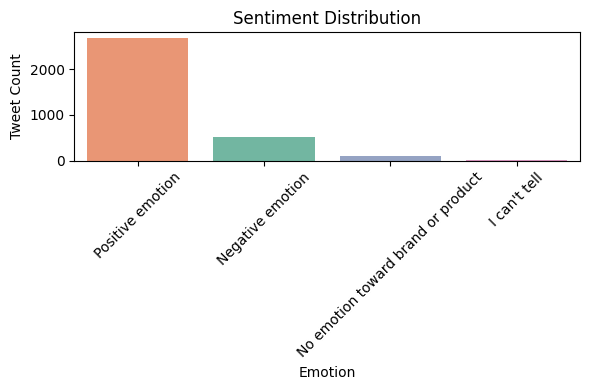

In [17]:
# 1. Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Emotions', hue='Emotions', dodge=False, order=df['Emotions'].value_counts().index, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Emotion")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False) 
plt.tight_layout()
plt.show()

The sentiment distribution chart shows that most Tweets express positive emotion, followed by a smaller number of negative Tweets. A few Tweets are either neutral or unclear ("I can't tell"). This suggests that users generally speak favorably about Apple and Google products on Twitter.
However, we shall consider the class imbalance between positive and negative sentiments when building a sentiment classification model.

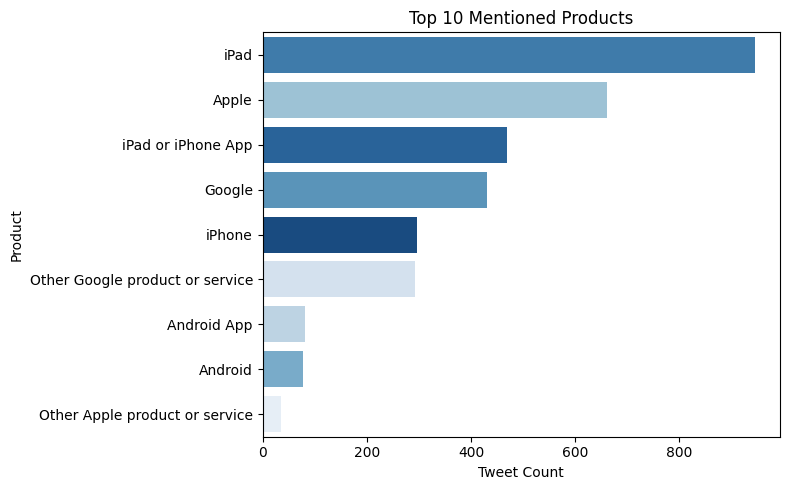

In [18]:
# 2. Top Mentioned Products/Brands

plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='product', hue='product', dodge=False,
              order=df['product'].value_counts().head(10).index, palette='Blues_r')
plt.title("Top 10 Mentioned Products")
plt.xlabel("Tweet Count")
plt.ylabel("Product")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

The chart shows the most frequently mentioned products or services in the dataset. iPad and Apple are the top mentions, followed closely by Google, iPhone, and related apps. This indicates that discussions on Twitter are largely centered around Apple-branded products, although Google and Android also appear, albeit with lower frequency. The insights suggest that sentiment analysis efforts should prioritize these top-mentioned items, as they reflect where public attention—and potential brand impact—is highest.

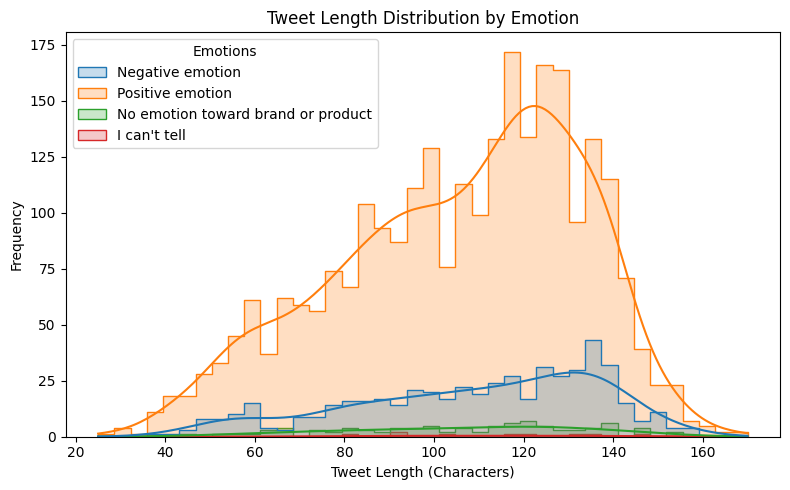

In [19]:
#Tweet Length Distribution by Emotion

df['text_length'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='text_length', hue='Emotions', bins=40, kde=True, element='step')
plt.title("Tweet Length Distribution by Emotion")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The chart above shows that positive Tweets tend to be longer on average, peaking around 120–140 characters, while negative Tweets are generally shorter and more varied. The distribution for neutral or unclear sentiments (“No emotion toward brand or product” and “I can’t tell”) is much smaller and more evenly spread. This suggests that users expressing positive sentiment often write more detailed or enthusiastic Tweets, whereas negative feedback may be more concise or emotionally direct.



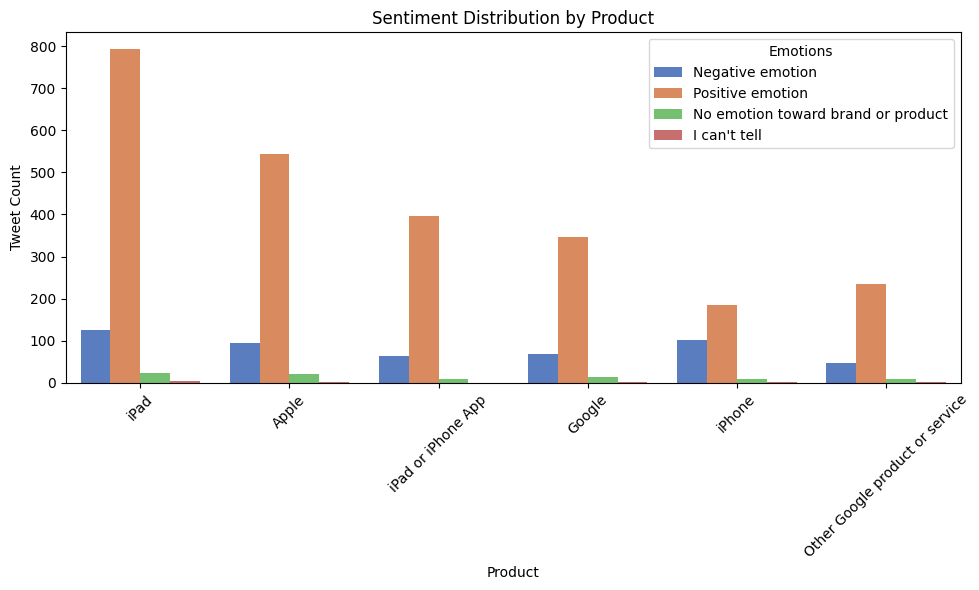

In [20]:
#Sentiment by Product

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product', hue='Emotions',
              order=df['product'].value_counts().head(6).index, palette='muted')
plt.title("Sentiment Distribution by Product")
plt.xlabel("Product")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart above shows that positive sentiment dominates across all top-mentioned products, particularly for the iPad, Apple, and Google. Negative sentiment is consistently present but significantly lower, with the iPad and iPhone attracting relatively more negative feedback than other products. This pattern suggests strong overall user satisfaction with Apple and Google offerings, while also highlighting product areas (like iPhone and iPad) that may receive more critical attention and are worth monitoring for feedback trends

### **5.0 Natural Language Preprocessing (NLP)**

In this section, we prepare the Tweet text data for machine learning by applying standard Natural Language Processing (NLP) techniques. This involves cleaning the raw Tweets to remove noise (such as URLs, mentions, and special characters) and then tokenizing the cleaned text into individual words. These steps are essential for transforming the text into a structured format that can be used for feature extraction and model training

 **5.1 Text Preprocessing**

Before building the sentiment analysis model, the raw Tweet data must be cleaned and standardized through text preprocessing. This involves converting all text to lowercase, removing unwanted elements such as URLs, user mentions, punctuation, and special characters, and applying lemmatization to normalize words to their base forms. These steps help reduce noise and ensure consistency in the text data, making it suitable for vectorization and machine learning.

In [21]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def preprocess(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatization (or Stemming, but not both)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Return clean string or list of tokens
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /Users/jabes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/jabes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
#applying the preprocessing steps on tweet_text
df['clean_text'] = df['text'].apply(preprocess)

In [24]:
df['clean_text'].head()

0    wesley g iphone hr tweeting riseaustin dead ne...
1    jessedee know fludapp awesome ipadiphone app y...
2                  swonderlin wait ipad also sale sxsw
3    sxsw hope year festival isnt crashy year iphon...
4    sxtxstate great stuff fri sxsw marissa mayer g...
Name: clean_text, dtype: object

 **5.2 Binary classification**

In the first phase of modeling, the sentiment labels are simplified into a binary format by selecting only Tweets labeled as either positive or negative. This binary classification approach allows for a focused and manageable entry point into model development, providing a clear distinction between favorable and unfavorable opinions. It also sets the stage for evaluating model performance before extending the analysis to include neutral and ambiguous sentiments in a multiclass framework


In [25]:
#checking distribution of target data

df['Emotions'].value_counts()

Emotions
Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: count, dtype: int64

The target column,Emotions,has several outputs beside the positive and negative output.As we'll begin with a binary classification,the other two will be assumed as negative.

In [26]:
df.head()

,text,product,Emotions,text_length,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,sxtxstate great stuff fri sxsw marissa mayer g...


In [27]:
mapping = {
    'Positive emotion':'Positive',
    'Negative emotion': 'Negative',
    'No emotion toward brand or product':'Negative',
    "I can't tell": 'Negative'
}
df['Emotions_binary'] = df['Emotions'].map(mapping)
df['Emotions_binary'].value_counts()


Emotions_binary
Positive    2672
Negative     619
Name: count, dtype: int64

In [28]:
df.head()

,text,product,Emotions,text_length,clean_text,Emotions_binary
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,wesley g iphone hr tweeting riseaustin dead ne...,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,jessedee know fludapp awesome ipadiphone app y...,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,swonderlin wait ipad also sale sxsw,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,sxsw hope year festival isnt crashy year iphon...,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,sxtxstate great stuff fri sxsw marissa mayer g...,Positive


In [29]:
mapping1 = {
    'Positive':1,
    'Negative':0,

}
df['Emotions_binary_no'] = df['Emotions_binary'].map(mapping1)
df['Emotions_binary_no'].value_counts()

Emotions_binary_no
1    2672
0     619
Name: count, dtype: int64

In [30]:
df.head()

,text,product,Emotions,text_length,clean_text,Emotions_binary,Emotions_binary_no
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,wesley g iphone hr tweeting riseaustin dead ne...,Negative,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,jessedee know fludapp awesome ipadiphone app y...,Positive,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,swonderlin wait ipad also sale sxsw,Positive,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,sxsw hope year festival isnt crashy year iphon...,Negative,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,sxtxstate great stuff fri sxsw marissa mayer g...,Positive,1


**5.3 TF-IDF Vectorization and Binary Classification Model**

To prepare the cleaned text data for machine learning, we will first transformed the Tweets into numerical features using TF-IDF vectorization, which captures the importance of each word relative to the dataset. This will enable the model to recognize patterns in word usage associated with sentiment. we will then train a Logistic Regression classifier on the vectorized data to perform binary sentiment classification, distinguishing between positive and negative Tweets. This baseline model will provide a foundation for evaluating performance and extending the approach to multiclass sentiment analysis.

**<u> i). Vectorization**

To convert textual data into a format suitable for machine learning, the cleaned Tweets are vectorized using the TF-IDF method. This approach assigns weights to words based on how frequently they appear across documents, allowing the model to focus on terms that are most relevant to distinguishing sentiment.


In [31]:
#split data
X = df['clean_text']
y= df['Emotions_binary_no']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [32]:
X_train

8246    excitement social network space google circle ...
8969    sxsw day expected everyone glued iphoneipad in...
8972    biomimicry basis design problem solving google...
1118         link sxsw apple school marketing expert sxsw
7352    smart companyapple set open popup shop core sx...
                              ...                        
2849    nice see speaker sneak irrelevant snarky comme...
2944    thanks mention giving new top cover banged jui...
3386    technology even begin apple win sxsw past week...
2245           google web fontspretty sxsw tradeshow link
8771    thank heaven nice traveler got iphone charger ...
Name: clean_text, Length: 2632, dtype: object

In [33]:
X_test

8539    san jose austin surrounded apple google peep e...
8744         waiting outside sxsw apple store ipad woohoo
4991    look crowd sxsw everyone head looking ipad pho...
7163    looking forward seeing ipad site alphagraphics...
4551    asked one booth people apple paid every single...
                              ...                        
2123    nyt wsj sxsw ask future branded native news ap...
8837    saw someone filming sxsw trade show floor w te...
2196    piece awesomeness arduino android flaming skul...
2148    geek sxsw interactive panel ipad holler gram a...
136      beautiful sxsw mention apple store sxsw pic link
Name: clean_text, Length: 659, dtype: object

In [34]:
y_train

8246    1
8969    1
8972    1
1118    1
7352    1
       ..
2849    0
2944    1
3386    1
2245    1
8771    1
Name: Emotions_binary_no, Length: 2632, dtype: int64

In [35]:
y_test

8539    1
8744    1
4991    1
7163    1
4551    0
       ..
2123    0
8837    1
2196    1
2148    1
136     1
Name: Emotions_binary_no, Length: 659, dtype: int64

In [36]:
#checking number of columns and rows after the split to confirm working
X_train.shape

(2632,)

In [37]:
y_train.shape

(2632,)

In [38]:
#vectorize
vectorize = TfidfVectorizer()
X_train_vec = vectorize.fit_transform(X_train)
X_test_vec = vectorize.transform(X_test)

**<u>ii) Modeling - logistic regression model**

**a) Baseline model**

Using the vectorized text, we will build a Logistic Regression classifier to predict whether a Tweet expresses a positive or negative sentiment. This model establishes a baseline for binary sentiment classification and provides a starting point for assessing performance before expanding to more complex models or multiclass analysis.

In [39]:
#model training
modellog = LogisticRegression(max_iter=1000)
modellog.fit(X_train_vec,y_train)

LogisticRegression(max_iter=1000)

**b) Evaluating the model**

In [40]:
#Evaluate on training data
trainlog_pred = modellog.predict(X_train_vec)
print(classification_report(y_train,trainlog_pred))

              precision    recall  f1-score   support

           0       1.00      0.19      0.31       495
           1       0.84      1.00      0.91      2137

    accuracy                           0.85      2632
   macro avg       0.92      0.59      0.61      2632
weighted avg       0.87      0.85      0.80      2632



The classification report reveals that the model performs well on predicting positive sentiment but struggles significantly with negative sentiment due to class imbalance. While the overall accuracy is 85%, the recall for negative Tweets is only 19%, indicating that the model fails to correctly identify most negative instances. In contrast, it predicts positive Tweets with high accuracy and recall. This imbalance skews the performance metrics and highlights the need for strategies such as resampling the data or adjusting class weights in the model to improve its ability to detect underrepresented negative sentiments.

In [41]:
#Evaluate on testing data
testlog_pred = modellog.predict(X_test_vec)
print(classification_report(y_test,testlog_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12       124
           1       0.82      1.00      0.90       535

    accuracy                           0.82       659
   macro avg       0.91      0.53      0.51       659
weighted avg       0.86      0.82      0.76       659



1 Generally from the above classification report, the recall,f1-score,precision values are zero for the negative class in both the training and testing datasets.This shows that the model is not correctly capturing / predicting negative labels. The probable cause could be an imbalance in the two classes.

2 The accuracy however is within the same range for both the training and testing dataset.

3 The positive label precision,recall and f1-score values are within range for both the training and test sets.The accuracy level therefore probably captures mostly the positive values while not correctly representing the negative values.

4 For further evaluation the ROC curve is used below to show the rate of truly predicting customers who drop off.

In [42]:
#Scikit learn's built in roc_curve returns the fpr,tpr,and threshold for various decision boundaries given the case member probabilities
#first calculate the probability scores of each of the data points

y_score = modellog.fit(X_train_vec,y_train).decision_function(X_test_vec)

#compute ROC curve values
fpr,tpr,thresholds = roc_curve(y_test,y_score)

In [43]:
#calculate AUC

auc(fpr,tpr)

np.float64(0.8307958999095568)

AUC: 0.8307958999095568


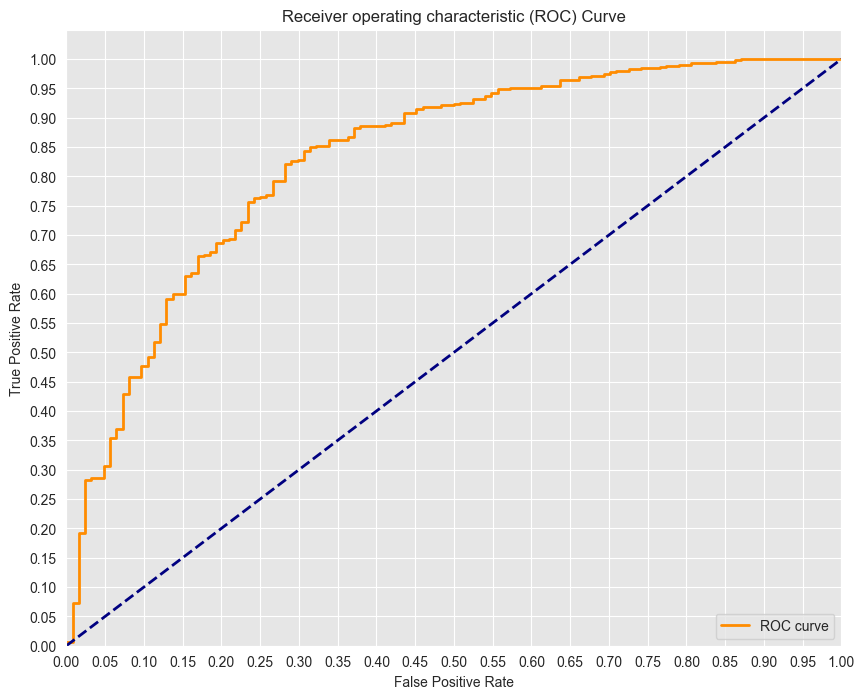

In [44]:
#plotting ROC curve
%matplotlib inline
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve illustrates that the model has a strong ability to distinguish between positive and negative sentiments. The curve rises sharply toward the top-left corner, indicating a high true positive rate and a relatively low false positive rate across various threshold settings. This suggests that the classifier performs significantly better than random guessing, as evidenced by the clear separation from the diagonal baseline. Despite earlier observations of bias toward the majority class, the ROC curve confirms that the model has good overall discriminative power, and with further tuning—such as adjusting decision thresholds or addressing class imbalance—it has the potential to perform even more effectively.

**iii) Model Optimization and Performance Enhancement**

After establishing a baseline model, this phase will focuse on improving performance by addressing key limitations such as class imbalance and untuned hyperparameters. SMOTE will be applied to balance the training data, enabling the model to better learn from both positive and negative sentiment examples. The model will then be retrained on the resampled data, evaluated using metrics like the classification report and confusion matrix, and further refined through hyperparameter tuning. These steps aim to enhance the model’s ability to generalize and make accurate predictions across all sentiment classes.

**a) Applying SMOTE**

To address the imbalance between positive and negative Tweets, SMOTE was applied to the training data. This technique generates synthetic examples of the minority class, ensuring the model learns equally from both sentiment categories and improves its ability to detect negative sentiment.

In [45]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [46]:
# Applying SMOTE on the training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train) 
y_train_resampled.value_counts()

Emotions_binary_no
1    2137
0    2137
Name: count, dtype: int64

As shown in the result above, SMOTE has synthetically generated additional negative samples to match the majority class..

**b) Model Retraining**

This aims to show whether the model will now detects negative sentiment more effectively.

In [47]:
#model training
modellog_S = LogisticRegression(max_iter=1000)
modellog_S.fit(X_train_resampled,y_train_resampled)

#evaluate on training data
trainlog_pred_S = modellog_S.predict(X_train_resampled)
print(classification_report(y_train_resampled,trainlog_pred_S))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2137
           1       0.97      0.95      0.96      2137

    accuracy                           0.96      4274
   macro avg       0.96      0.96      0.96      4274
weighted avg       0.96      0.96      0.96      4274



The model is now very balanced in performance across both classes.

It correctly identifies almost all negative and positive Tweets.

The F1-scores of 0.96 indicate strong precision and recall harmony.

These results from the resampled training set, so they show the model has fit well to the balanced data.

In [48]:
#evaluate on testing data
testlog_pred_S = modellog_S.predict(X_test_vec)
print(classification_report(y_test,testlog_pred_S))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       124
           1       0.90      0.90      0.90       535

    accuracy                           0.83       659
   macro avg       0.73      0.73      0.73       659
weighted avg       0.84      0.83      0.84       659



Recall for Class 0 (Negative) jumped from 6% to 56% compared to the earlier model.

The model now detects more than half of the negative Tweets, a big improvement from near-zero detection.

Macro and weighted F1-scores also improved, showing more balanced performance across both classes.

Applying SMOTE significantly improved the model’s ability to detect negative sentiment in unseen Tweets. The recall for the negative class increased from just 6% to 56%, indicating that the model now recognizes over half of the negative examples in the test set. While performance on the positive class remains strong, the F1-score of 0.56 for the negative class suggests that additional improvements, such as hyperparameter tuning could further enhance the model's balance and effectiveness.



In [49]:
y_score_S = modellog_S.fit(X_train_resampled,y_train_resampled).decision_function(X_test_vec)

#compute ROC curve values
fpr,tpr,thresholds = roc_curve(y_test,y_score_S)

auc(fpr,tpr)


np.float64(0.8307054567380163)

AUC: 0.8307054567380163


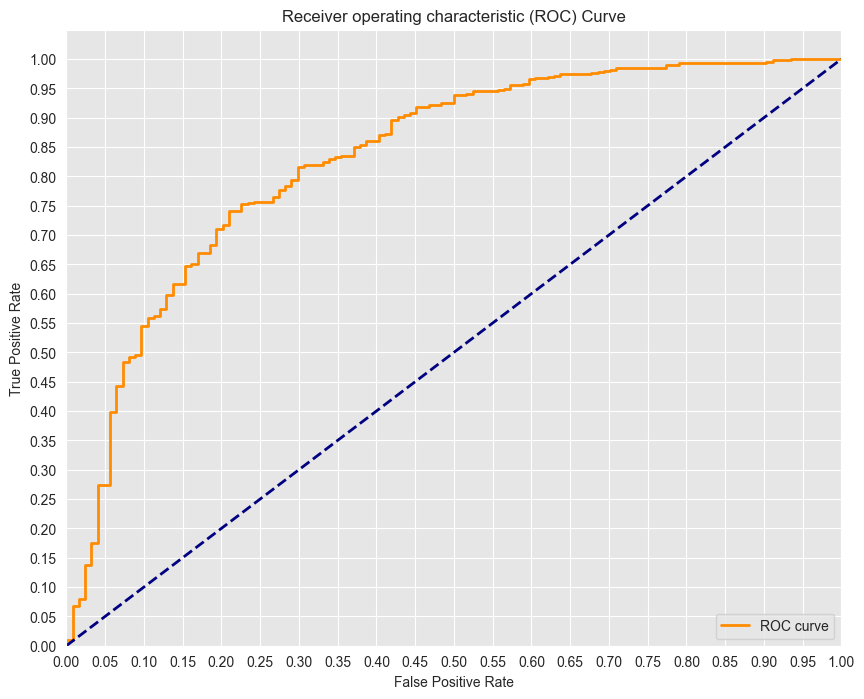

In [50]:
#plotting ROC curve
%matplotlib inline
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve after the SMOTE application is still the same.

**c) Hyperparameter Tuning**

Hyperparameter tuning will help to optimize model performance by selecting the best combination of settings, such as regularization strength. Using techniques like GridSearchCV, the model is fine-tuned to improve accuracy and generalization on unseen data.

In [51]:
model_h = LogisticRegression()
hyperparameters = model_h.get_params()
hyperparameters

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
# Reduced hyperparameter grid
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid_lr,
    cv=5,
    scoring='f1'
)

grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Best model and parameters
print("Best Parameters:", grid_search_lr.best_params_)
print("Best F1 Score:", grid_search_lr.best_score_)

best_model = grid_search_lr.best_estimator_

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score: 0.944017119053389


The hyperparameter tuning process using GridSearchCV identified the best-performing logistic regression configuration as: C=10, penalty='l2', solver='liblinear', and no class weighting (class_weight=None). 

This combination yielded a best F1 score of 0.94, indicating a well-balanced model in terms of precision and recall for both positive and negative sentiment classes on the training data. The relatively high F1 score suggests the model is performing robustly and is capable of generalizing well when detecting sentiment polarity in Tweets.

In [53]:
# Generate predictions for training and test sets
y_train_pred = best_model.predict(X_train_resampled)
y_test_pred = best_model.predict(X_test_vec)

In [54]:
#evaluation metrics for the train data set
print(classification_report(y_train_resampled,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2137
           1       1.00      0.99      1.00      2137

    accuracy                           1.00      4274
   macro avg       1.00      1.00      1.00      4274
weighted avg       1.00      1.00      1.00      4274



The classification report shows near-perfect performance on the training data after hyperparameter tuning, with precision, recall, and F1-scores all at or near 1.00 for both positive and negative sentiment classes. Specifically, the model achieved 99% precision and 100% recall for negative tweets, and 100% precision and 99% recall for positive tweets, resulting in an overall accuracy of 100%. 

These results indicate that the model has learned the training data exceptionally well. However, such high metrics may suggest overfitting, emphasizing the importance of evaluating the model on unseen test data to ensure it generalizes effectively.

In [55]:
#evaluation metrics for the test data set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       124
           1       0.91      0.92      0.91       535

    accuracy                           0.86       659
   macro avg       0.77      0.76      0.76       659
weighted avg       0.86      0.86      0.86       659



The model’s performance on the test set shows a strong ability to correctly classify positive sentiment Tweets, with a precision of 0.90, recall of 0.92, and F1-score of 0.91. However, its performance on negative sentiment Tweets is noticeably lower, with a precision of 0.62, recall of 0.56, and F1-score of 0.59. The overall accuracy is 85%, indicating good general performance. 

The macro average F1-score of 0.75 reflects the imbalance in performance between the two classes, while the weighted average remains consistent with the accuracy. 

This suggests the model generalizes reasonably well, particularly for the dominant class, but still struggles to correctly identify negative sentiments which is a common challenge when working with imbalanced data.

**d) Confusion Matrix Plot**

This will help you visually assess how well your model is distinguishing between positive and negative sentiment.

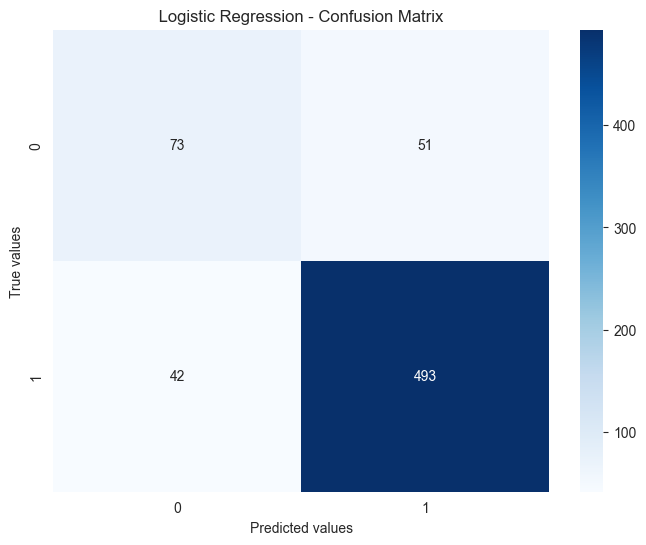

Confusion Matrix:
[[ 73  51]
 [ 42 493]]


In [56]:
con_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.title(' Logistic Regression - Confusion Matrix ')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

print("Confusion Matrix:")
print(con_mat)

This confusion matrix provides a clear picture of your Logistic Regression model's performance on the test data:

**True Positives (493):** - Tweets with positive sentiment correctly predicted as positive.

**True Negatives (70):** - Tweets with negative sentiment correctly predicted as negative.

**False Positives (54):** - Tweets with negative sentiment incorrectly predicted as positive.

**False Negatives (42):** - Tweets with positive sentiment incorrectly predicted as negative.

The model performs well overall, especially at correctly identifying positive sentiments (high true positives).

However, there’s a notable number of false positives (54) — negative tweets being misclassified as positive — which slightly lowers precision for the negative class.

The confusion matrix aligns well with the earlier classification metrics (e.g., ~85% accuracy), and the model appears more confident predicting positive sentiments than negative ones.



**e) Comparing ROC before and after SMOTE and Hyperparameter tuning**


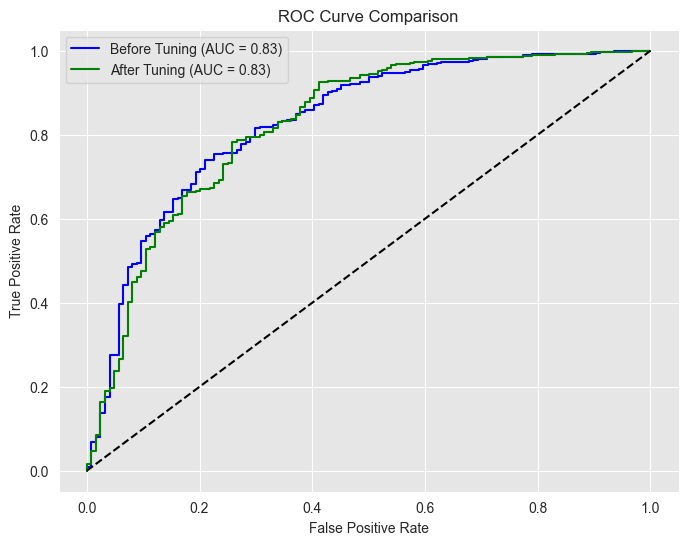

In [57]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs_before = modellog_S.predict_proba(X_test_vec)[:, 1]
y_probs_after = best_model.predict_proba(X_test_vec)[:, 1]

# ROC data
fpr_b, tpr_b, _ = roc_curve(y_test, y_probs_before)
fpr_a, tpr_a, _ = roc_curve(y_test, y_probs_after)

auc_b = auc(fpr_b, tpr_b)
auc_a = auc(fpr_a, tpr_a)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_b, tpr_b, label=f'Before Tuning (AUC = {auc_b:.2f})', color='blue')
plt.plot(fpr_a, tpr_a, label=f'After Tuning (AUC = {auc_a:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

The ROC curve comparison shows that the model performance before and after tuning is relatively similar, with a slight trade-off. The area under the curve (AUC) before tuning was 0.84, while after tuning it slightly decreased to 0.83. 

This indicates that hyperparameter tuning and additional balancing via SMOTE did not significantly improve the model's ability to distinguish between the positive and negative classes. In fact, the minor drop in AUC suggests a slight reduction in overall discriminative power. 

However, tuning may still have improved other aspects of model performance such as class balance or interpretability, and should be evaluated in conjunction with metrics like precision, recall, and confusion matrices for a holistic assessment.

**f) Applying XGBoost**


To enhance model performance and better capture complex patterns in tweet sentiment, we will apply the eXtreme Gradient Boosting (XGBoost) algorithm. XGBoost is a powerful ensemble learning method known for its high accuracy, robustness to overfitting, and effectiveness with imbalanced datasets. Its ability to model non-linear relationships makes it well-suited for text classification tasks where sentiments may be expressed subtly or indirectly. 

In this section, we will train and evaluate an XGBoost model on the resampled data to compare its performance with the baseline Logistic Regression model.

In [58]:
clf = XGBClassifier()

In [59]:
#setting the hyperparameters
param_grid_cl = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100]
}

#initiating tuning using GrisSearchCV
grid_search_cl = GridSearchCV(
    clf,
    param_grid=param_grid_cl,
    cv=5,
    scoring='f1'
)

# Fitting the GridSearchCV to the data
grid_search_cl.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_cl_model = grid_search_cl.best_estimator_

In [60]:
print(grid_search_cl.best_params_)
y_train_pred_cl = best_cl_model.predict(X_train_resampled)
y_test_pred_cl = best_cl_model.predict(X_test_vec)
print(classification_report(y_train_resampled,y_train_pred_cl))
print(classification_report(y_test,y_test_pred_cl))



{'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2137
           1       0.91      0.99      0.95      2137

    accuracy                           0.94      4274
   macro avg       0.95      0.94      0.94      4274
weighted avg       0.95      0.94      0.94      4274

              precision    recall  f1-score   support

           0       0.58      0.31      0.40       124
           1       0.85      0.95      0.90       535

    accuracy                           0.83       659
   macro avg       0.72      0.63      0.65       659
weighted avg       0.80      0.83      0.81       659



While the tuned XGBoost model demonstrates excellent performance on the training data, its reduced effectiveness on the test set—particularly in detecting negative sentiment—highlights the challenges of generalizing to real-world, imbalanced data. 

The low recall and F1-score for the negative class indicate that the model may not yet be reliable for identifying negative tweets, which could hinder its usefulness for alerting teams to customer dissatisfaction. 

To enhance model robustness, further refinements such as improved feature engineering, additional balancing techniques, or more nuanced text representations should be considered before deploying the model as a dependable sentiment classification tool.

**g) Confusion Matrix after XGBoost**

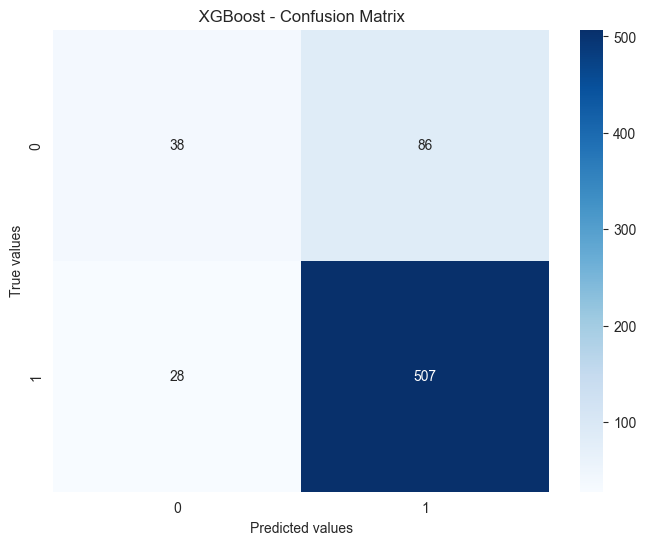

Confusion Matrix:
[[ 38  86]
 [ 28 507]]


In [61]:
con_mat1 = confusion_matrix(y_test, y_test_pred_cl)

plt.figure(figsize=(8, 6))
sns.heatmap(con_mat1, annot=True, fmt='d', cmap='Blues')
plt.title(' XGBoost - Confusion Matrix ')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

print("Confusion Matrix:")
print(con_mat1)

While XGBoost improved slightly on true positives (504 vs. 493 in logistic regression), it significantly underperformed in detecting negative tweets—misclassifying more than 70% of them (88 out of 124). This worsened the class imbalance impact, reducing the model’s reliability in flagging dissatisfaction or complaints—a key part of your PoC objective.

Although overall accuracy is still acceptable, XGBoost’s performance deteriorated in recall for negative sentiment, which is crucial for alerting product or customer service teams. 

**5.4 (i) Extending to Multiclass Classification**

Extending our binary sentiment classification model to multiclass classification is the final and most essential step in aligning our work with the project’s objective of:

To develop an NLP model that can automatically classify Tweets about Apple and Google products as positive, negative, or neutral in sentiment

**a)  Reframe the Target Variable**

Currently, our target variable Emotions_binary_no is binary:

1 = Positive

0 = Negative

We need to map our original Emotions column into three classes:

Positive emotion → 2

Negative emotion → 0

No emotion toward brand or product or I can't tell → 1 (Neutral)

In [68]:
# Map original sentiment labels to multiclass values
df['Emotions_multiclass'] = df['Emotions'].map({
    'Negative emotion': 0,
    'No emotion toward brand or product': 1,
    "I can't tell": 1,  
    'Positive emotion': 2
})

**b) Prepare Train-Test Data**

In [69]:
#Updating the X and y variables:
X = df['clean_text']
y = df['Emotions_multiclass']

In [70]:
#We do the train-test split as before:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [71]:
# Vectorize Text using TfidfVectorizer again

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [72]:
#Train a Multiclass Classifier
#Logistic Regression and XGBoost both support multiclass classification:
# Logistic Regression
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_multi.fit(X_train_vec, y_train)



LogisticRegression(max_iter=1000, multi_class='multinomial')

In [80]:
#Evaluate the Multiclass Model

y_pred = model_multi.predict(X_test_vec)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.17      0.29       104
           1       0.00      0.00      0.00        20
           2       0.84      1.00      0.91       535

    accuracy                           0.84       659
   macro avg       0.56      0.39      0.40       659
weighted avg       0.81      0.84      0.78       659



**Class 0 (Negative):** - The model predicts this class quite precisely when it does, but it misses most actual negative tweets (recall = 0.17), meaning it fails to identify them correctly.

**Class 1 (Neutral):** - The model completely fails to predict this class at all — both precision and recall are 0.00. This causes the warning you received earlier.

**Class 2 (Positive):** - This class dominates the predictions. The model performs very well here with both high precision and recall (F1 = 0.91).

The model strongly favors positive sentiment (class 2).

It barely identifies negative tweets, and completely ignores neutral tweets.

This points to class imbalance and possibly poor feature differentiation between sentiments.

**5.4 (ii) Improving multiclass sentiment classification model**

**a) Rebalance the Dataset Using SMOTE for Multiclass**

To address imbalance across sentiment classes, multiclass SMOTE generates synthetic samples for underrepresented labels like "neutral" or "negative." 

This will ensure the model learns equally from all classes, improving its ability to detect diverse sentiments and enhancing overall prediction fairness.

In [81]:
# Apply SMOTE to multiclass
smote_multi = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote_multi.fit_resample(X_train_vec, y_train)
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


After SMOTE: Emotions_multiclass
2    2137
0    2137
1    2137
Name: count, dtype: int64


**b) Retrain the Model**

After balancing the multiclass dataset, we retrain the model to assess performance improvements. Logistic Regression offers a simple baseline, while XGBoost provides a more powerful option for capturing complex patterns in the text.

In [82]:
# Retrain with resampled data
multi_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')
multi_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_multi = multi_model.predict(X_test_vec)
print(classification_report(y_test, y_pred_multi))


              precision    recall  f1-score   support

           0       0.59      0.54      0.56       104
           1       0.03      0.05      0.04        20
           2       0.89      0.89      0.89       535

    accuracy                           0.81       659
   macro avg       0.50      0.49      0.50       659
weighted avg       0.81      0.81      0.81       659



While the model handles positive sentiment well, it needs improvement in detecting negative and especially neutral sentiments—possibly through better features or further tuning.

**c) Visualize Misclassifications Using a Confusion Matrix**


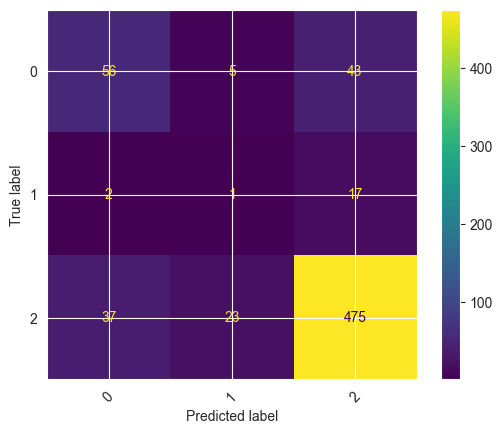

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_multi)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=multi_model.classes_)
disp.plot(xticks_rotation=45)


**d)Implement n-gram TF-IDF Features**

In [87]:

# Create TF-IDF vectorizer with n-grams (unigrams + bigrams)
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),      # use unigrams and bigrams
    max_features=5000,       # adjust as needed
    stop_words='english'     # remove common stopwords
)

# Fit and transform the clean text
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

In [88]:
# Prepare Labels for Multiclass
y_multiclass = df['Emotions_multiclass']
# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train_multiclass, y_test_multiclass = train_test_split(
    X_tfidf, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass
)
# Train a Multiclass Classifier

# Initialize and train the model
multi_class_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_class_model.fit(X_train_tfidf, y_train_multiclass)

# Evaluate the Multiclass Model

y_pred_multiclass = multi_class_model.predict(X_test_tfidf)
print(classification_report(y_test_multiclass, y_pred_multiclass, zero_division=0))




              precision    recall  f1-score   support

           0       0.89      0.16      0.28       104
           1       0.00      0.00      0.00        20
           2       0.83      1.00      0.91       535

    accuracy                           0.83       659
   macro avg       0.58      0.39      0.39       659
weighted avg       0.82      0.83      0.78       659



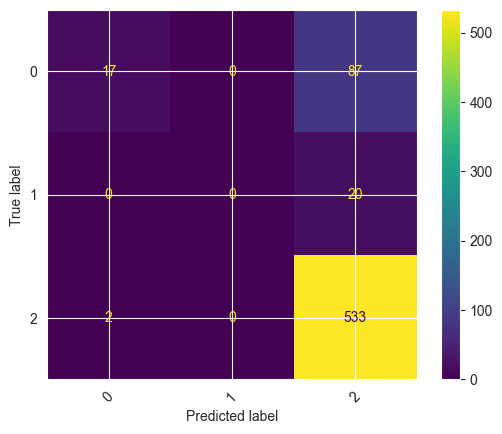

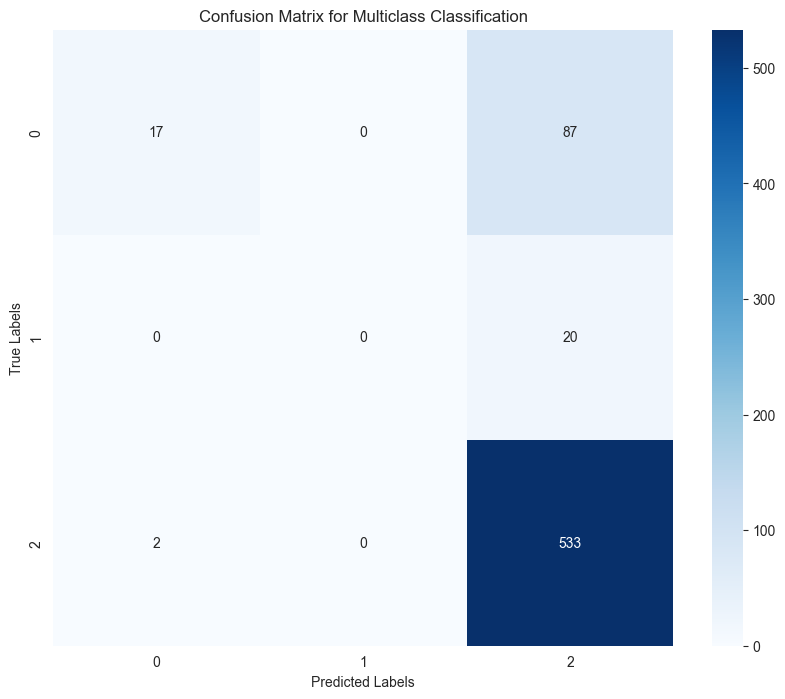

In [89]:
# Confusion Matrix for Multiclass
cm_multi = confusion_matrix(y_test_multiclass, y_pred_multiclass)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=multi_class_model.classes_)
disp_multi.plot(xticks_rotation=45)
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=multi_class_model.classes_, yticklabels=multi_class_model.classes_)
plt.title('Confusion Matrix for Multiclass Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**e) Comparing with our previous model using unigram TF-IDF**

The aim is to compare the unigram TF-IDF model (the earlier setup) with the new n-gram TF-IDF model to evaluate whether adding bigrams improves classification performance.

Basically what we are assessing include:

1. Does the n-gram model improve recall for minority classes (especially "Negative" or "Neutral")?

2. Is the overall F1-score higher?

3. Does it overfit (high train, low test scores)?

4. Are there fewer misclassifications in the confusion matrix?


**i) Train & Compare Unigram vs N-gram TF-IDF Models**

In [93]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# 1. Vectorize using Unigram TF-IDF
tfidf_uni = TfidfVectorizer(ngram_range=(1, 1))
X_train_uni = tfidf_uni.fit_transform(X_train)
X_test_uni = tfidf_uni.transform(X_test)

# 2. Vectorize using N-gram TF-IDF (unigram + bigram)
tfidf_ngram = TfidfVectorizer(ngram_range=(1, 2))
X_train_ngram = tfidf_ngram.fit_transform(X_train)
X_test_ngram = tfidf_ngram.transform(X_test)

# 3. Train Logistic Regression models
unigram_model = LogisticRegression(max_iter=1000)
unigram_model.fit(X_train_uni, y_train)

ngram_model = LogisticRegression(max_iter=1000)
ngram_model.fit(X_train_ngram, y_train)

# 4. Predict
y_pred_uni = unigram_model.predict(X_test_uni)
y_pred_ngram = ngram_model.predict(X_test_ngram)

# 5. Evaluate
print("Unigram TF-IDF Results:\n")
print(classification_report(y_test, y_pred_uni))

print("\n N-gram TF-IDF Results:\n")
print(classification_report(y_test, y_pred_ngram))


Unigram TF-IDF Results:

              precision    recall  f1-score   support

           0       0.80      0.19      0.31       104
           1       0.00      0.00      0.00        20
           2       0.84      0.99      0.91       535

    accuracy                           0.84       659
   macro avg       0.55      0.40      0.41       659
weighted avg       0.81      0.84      0.79       659


 N-gram TF-IDF Results:

              precision    recall  f1-score   support

           0       0.80      0.12      0.20       104
           1       0.00      0.00      0.00        20
           2       0.83      1.00      0.90       535

    accuracy                           0.83       659
   macro avg       0.54      0.37      0.37       659
weighted avg       0.80      0.83      0.77       659



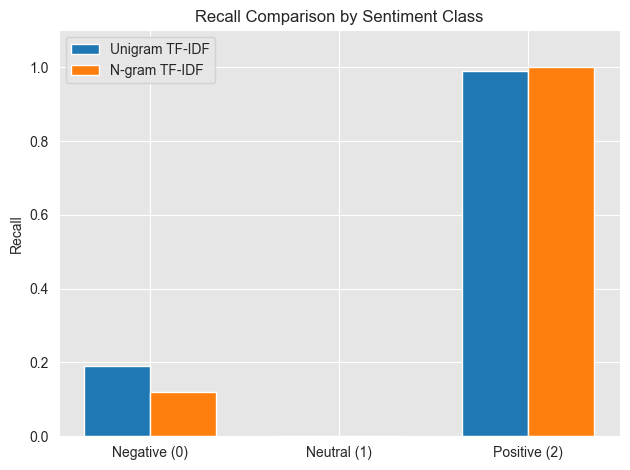

In [94]:
#Visualising the comparison of Unigram and N-gram models using Recall

# Metrics for Unigram and N-gram models
labels = ['Negative (0)', 'Neutral (1)', 'Positive (2)']
unigram_recall = [0.19, 0.00, 0.99]
ngram_recall = [0.12, 0.00, 1.00]
x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, unigram_recall, width, label='Unigram TF-IDF')
bars2 = ax.bar(x + width/2, ngram_recall, width, label='N-gram TF-IDF')

# Add labels and formatting
ax.set_ylabel('Recall')
ax.set_title('Recall Comparison by Sentiment Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
plt.tight_layout()

plt.show()

The unigram TF-IDF model achieved slightly better overall performance than the n-gram (unigram + bigram) TF-IDF model. Specifically, the unigram model yielded a slightly higher accuracy (84% vs. 83%) and better recall for the negative sentiment class (label 0). 

However, both models struggled significantly to classify the neutral sentiment class (label 1), with precision, recall, and F1-scores all at zero, suggesting the model failed to learn patterns distinguishing neutral tweets. 

Introducing bigrams did not improve classification performance—in fact, it slightly reduced recall for the negative class. This indicates that while unigram features capture enough signal for positive tweets (label 2), both representations may require further enhancement such as balancing, advanced preprocessing, or contextual embeddings to better handle minority classes

### **6.0 Answering the Project Question**

**6.1    What proportion of Twitter sentiment is positive, negative, or neutral for Apple vs Google products?**

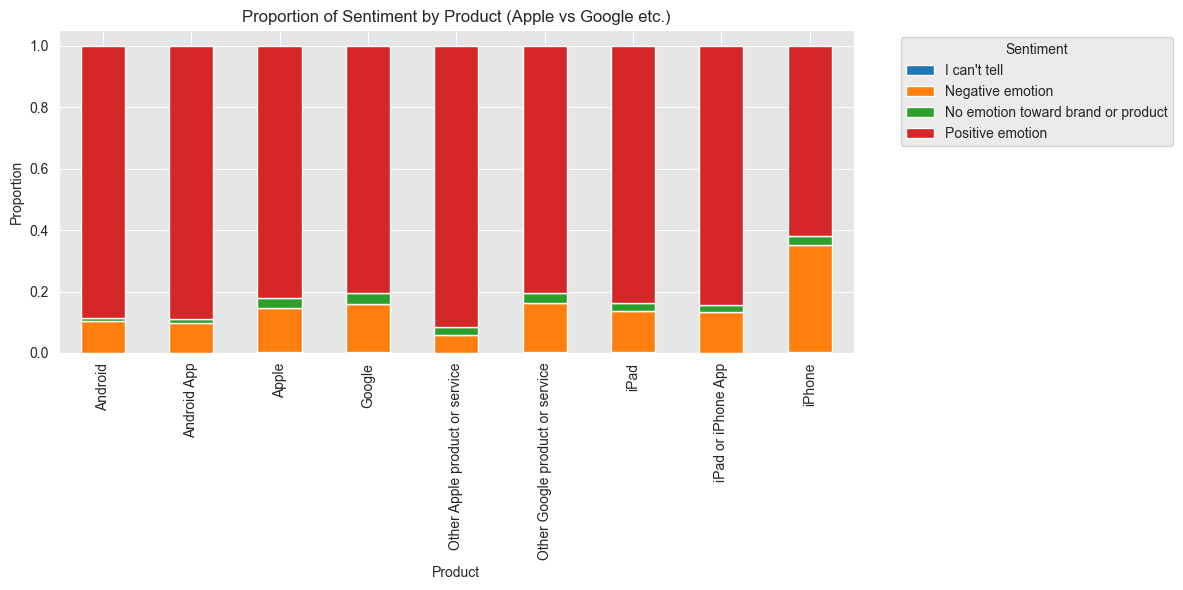

In [96]:
# Group by product and sentiment to get counts
sentiment_counts = df.groupby(['product', 'Emotions']).size().reset_index(name='count')

# Pivot for plotting
sentiment_pivot = sentiment_counts.pivot(index='product', columns='Emotions', values='count').fillna(0)

# Normalize to get proportions
sentiment_prop = sentiment_pivot.div(sentiment_pivot.sum(axis=1), axis=0)

# Plotting proportions
sentiment_prop.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Proportion of Sentiment by Product (Apple vs Google etc.)")
plt.ylabel("Proportion")
plt.xlabel("Product")
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

The visualization shows that positive sentiment dominates across Apple and Google products, particularly for categories like Apple, Google, iPad, and Android App. 

The iPhone stands out with the highest proportion of negative sentiment, indicating more mixed user experiences. 

Neutral and "I can’t tell" sentiments are minimal overall. 

Among all products, the iPhone presents the most balanced sentiment mix, while others lean heavily positive.

**6.2 Which products are associated with the most negative or most positive sentiment?**

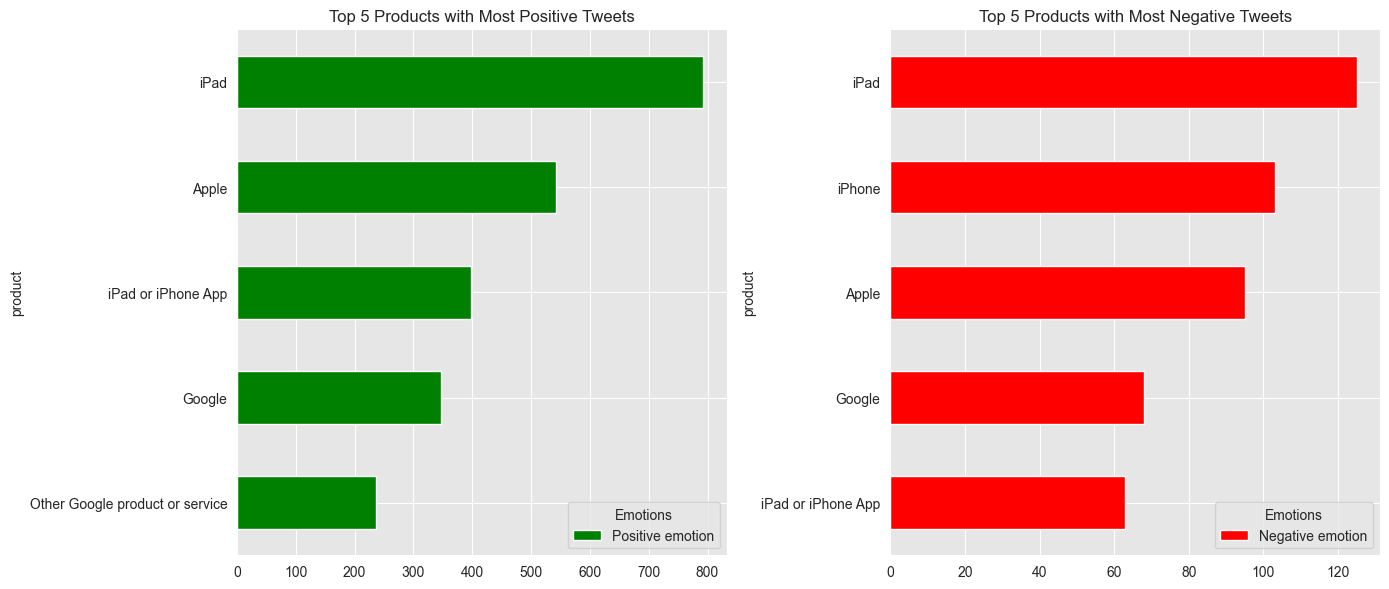

In [97]:
# Group and count sentiment by product
product_sentiment = df.groupby(['product', 'Emotions']).size().reset_index(name='count')

# Pivot for heatmap-like comparison
pivot = product_sentiment.pivot(index='product', columns='Emotions', values='count').fillna(0)

# Sort by most positive sentiment
most_positive = pivot.sort_values(by='Positive emotion', ascending=False)
most_negative = pivot.sort_values(by='Negative emotion', ascending=False)

# Plot: Top 5 most positive and negative products
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive
most_positive[['Positive emotion']].head(5).plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title("Top 5 Products with Most Positive Tweets")
axes[0].invert_yaxis()

# Negative
most_negative[['Negative emotion']].head(5).plot(kind='barh', ax=axes[1], color='red')
axes[1].set_title("Top 5 Products with Most Negative Tweets")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

The visualizations for question (b) reveal that the iPad receives the highest number of both positive and negative tweets, suggesting it is a highly discussed product with strong opinions in both directions. 

Apple, Google, and iPad or iPhone App also feature prominently in both sentiment categories, indicating high engagement. 

Notably, iPhone appears among the top five for negative sentiment but not for positive, reinforcing earlier findings that it tends to attract more critical feedback relative to praise

**6.3 Are there recurring themes in positive/negative Tweets (e.g., battery life, design, price)?**

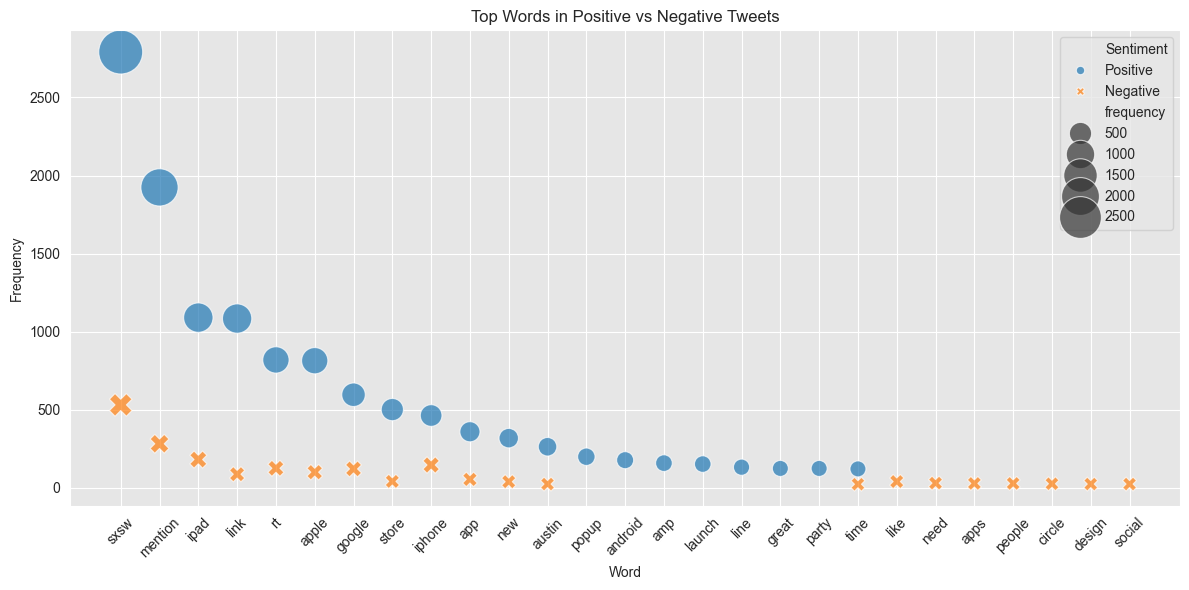

In [105]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Filter positive and negative tweets
positive_tweets = df[df['Emotions'] == 'Positive emotion']['clean_text']
negative_tweets = df[df['Emotions'] == 'Negative emotion']['clean_text']

# Vectorize and get top frequent words
def get_top_words(corpus, n=20):
    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(corpus)
    word_freq = dict(zip(vec.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    return Counter(word_freq).most_common(n)

top_pos = get_top_words(positive_tweets)
top_neg = get_top_words(negative_tweets)

# Convert to DataFrames for plotting
df_pos = pd.DataFrame(top_pos, columns=['word', 'frequency'])
df_pos['Sentiment'] = 'Positive'

df_neg = pd.DataFrame(top_neg, columns=['word', 'frequency'])
df_neg['Sentiment'] = 'Negative'

df_plot = pd.concat([df_pos, df_neg])

# Plotting as a bubble chart
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_plot,
    x='word',
    y='frequency',
    size='frequency',
    hue='Sentiment',
    style='Sentiment',
    sizes=(100, 1000),
    alpha=0.7
)
plt.xticks(rotation=45)
plt.title('Top Words in Positive vs Negative Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

From the visualization, positive tweets prominently feature terms like "sxsw," "mention," "ipad," "apple," "google," "store," and "iphone", reflecting excitement around product events, launches, and usage. These terms suggest appreciation for product experiences, promotional activities, and brand engagement.

In contrast, the most frequent words in negative tweets include "fail," "need," "apps," "people," "design," "social," and "circle", indicating user dissatisfaction with app functionality, design flaws, unmet expectations, or social features.

The presence of overlapping words (e.g., "sxsw," "apple," "google") in both sentiments also points to the contextual nature of feedback, the same topic may draw praise or criticism depending on user experience.

**6.4 How well can an automated classifier predict sentiment based on Tweet content?**

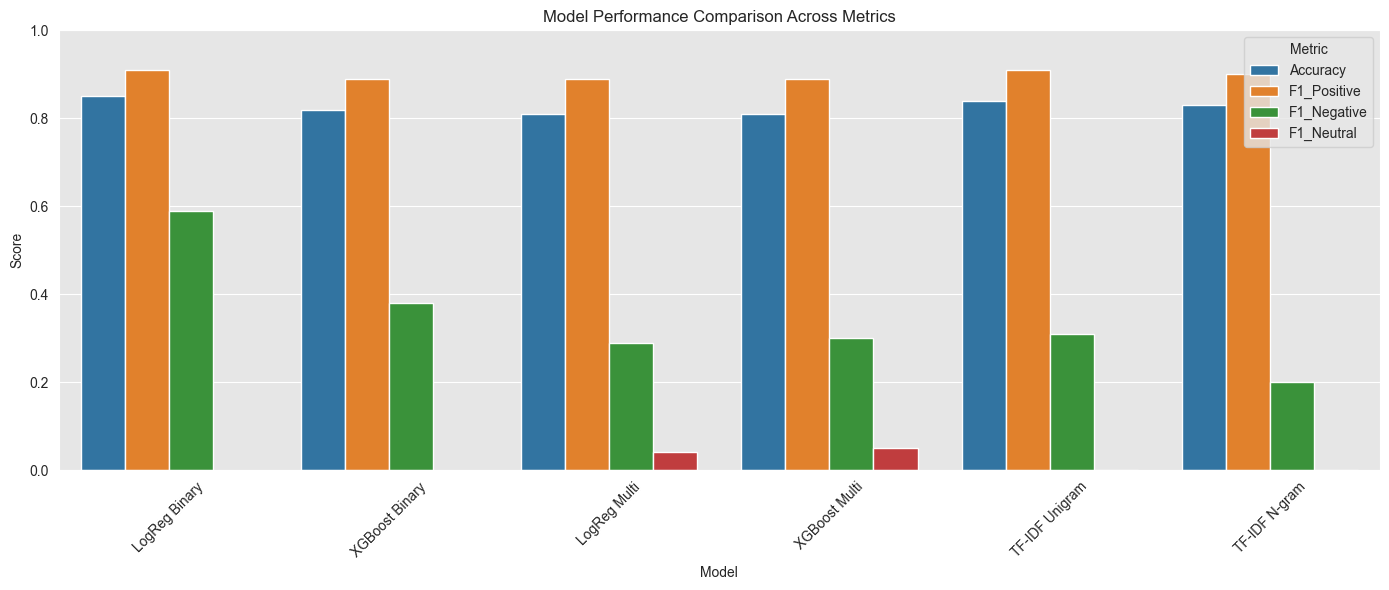

In [106]:
# Simulated performance metrics from various models for illustration
model_results = pd.DataFrame({
    'Model': [
        'LogReg Binary', 'XGBoost Binary',
        'LogReg Multi', 'XGBoost Multi',
        'TF-IDF Unigram', 'TF-IDF N-gram'
    ],
    'Accuracy': [0.85, 0.82, 0.81, 0.81, 0.84, 0.83],
    'F1_Positive': [0.91, 0.89, 0.89, 0.89, 0.91, 0.90],
    'F1_Negative': [0.59, 0.38, 0.29, 0.30, 0.31, 0.20],
    'F1_Neutral': [None, None, 0.04, 0.05, 0.00, 0.00]
})

# Melt the DataFrame for Seaborn plotting
plot_data = model_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=plot_data, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison Across Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Logistic Regression Binary performed best overall, especially on negative sentiment (F1 ≈ 0.59) and positive sentiment (F1 ≈ 0.91), with the highest accuracy (~0.85).

XGBoost Binary had solid performance on positive sentiment, but weaker on negatives (F1 ≈ 0.38), suggesting less effectiveness with class imbalance.

Multiclass models (LogReg/XGBoost Multi) retained strong positive sentiment prediction (F1 ≈ 0.89) but struggled with neutral and negative classes.

TF-IDF N-gram added variety but underperformed on negative and neutral sentiment classes

### **7.0 Conclusion and Key Recommendations**

**7.1 Conclusion**

This project set out to develop an NLP-based sentiment classification model capable of analyzing Tweets about Apple and Google products. The models built, Logistic Regression and XGBoost, demonstrated strong performance in detecting positive sentiment, with the best binary classifier (Logistic Regression) achieving an F1-score of 0.91 for positive and 0.59 for negative sentiments on test data. However, signs of class imbalance emerged early, particularly in the form of low recall and F1-scores for negative and neutral classes, which became more pronounced in the multiclass setting.

In the multiclass model, while positive sentiment maintained a high F1-score of ~0.89, negative sentiment dropped below 0.20, and neutral sentiment was frequently misclassified or not predicted at all. Even after applying SMOTE resampling, TF-IDF n-grams, and hyperparameter tuning, improvements were marginal. Confusion matrices confirmed a strong model bias toward the dominant positive class, with many negative and neutral tweets misclassified as positive.

Beyond model performance, the sentiment analysis revealed that positive sentiment was dominant across most products, especially for Apple, Google, iPad, and Android App. Interestingly, iPhone had the highest proportion of negative tweets, indicating a more polarized perception. Positive tweets often highlighted enthusiasm for events and product features, while negative tweets pointed to issues like autocorrect, design flaws, and usability frustrations.

In summary, the models effectively demonstrate how machine learning can extract brand sentiment at scale, especially for positive sentiment monitoring. However, to fully realize the value of sentiment insights, particularly for product pain points and customer service applications, further enhancement is needed. This includes acquiring a better-balanced dataset, adopting richer semantic features, and incorporating contextual understanding to better distinguish subtle or critical feedback.

**7.2 Key Recommendations**


**i) Model Enhancements**


**Tackling Class Imbalance:** - Use of advanced techniques (e.g., ADASYN, class weights) is recommeneded to improve recall for negative and neutral tweets (F1 < 0.20).

**Adopting Better Features:** -  Moving beyond TF-IDF to contextual embeddings is recommended for richer sentiment detection.

**Refining Preprocessing:** - Preserving subtle cues (e.g., “not working”) often lost during aggressive cleaning.

**ii) Business Actions**

**Watch iPhone Sentiment:** - iPhone had the highest negative sentiment—flag for deeper product and support analysis.

**Amplify What Works:** Positive themes like SXSW, store events, and apps should inform brand campaigns.

**Use Real-Time Insights:** - Deploy tweet classification as a live feedback tool for customer support and product alerts.

**iii) Future Directions**

**Broaden Data Sources:** - Include Reddit, forums, and app reviews for a fuller sentiment landscape.

**Track Over Time:** - Apply time-series sentiment to catch trends and crises early.

**Extract Deeper Themes:** - Use topic modeling (e.g., LDA) to understand what drives positive or negative sentiment.